Engy-5310: Computational Continuum Transport Phenomena Fall 2021 UMass Lowell; Prof. V. F. de Almeida **05Oct21**

# Homework 03 (05Oct21)

$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
$

### Name: `your name`

### Rubric for each assignment: 

|       Context               |  Points |
| -----------------------     | ------- |
| Precision of the answer     |   80%   |
| Answer Markdown readability |   10%   |
| Code readability            |   10%   |

### <span style="color:red">Guidance:</span>

+  <span style="color:red"> 
    Save your work frequently to a file locally to your computer.
   </span>
+  <span style="color:red">
    During your work and before submitting the final version do:</span> Kernel -> Restart & Run All<span style="color:red">, to verify your notebook runs correctly.
   </span>
+  <span style="color:red">
    Save your file again.
   </span>
+  <span style="color:red">
    Upload the notebook file in the Blackboard submission portal as: 
   </span> 
   
   **lastname-firstname-labwork-xx.ipynb**

---
## Table of Assignments<a id="toa"></a>
* [Assignment 1 (30 pts)](#a1) Function approximation with constrained end-points.
 - [1.1)](#a11)(5 pts) Generate the target function.
 - [1.2)](#a12)(10 pts) Compute parameters for a given error level.
 - [1.3)](#a13)(15 pts) Using the same basis functions, approximate the target function continuously ($m\rightarrow\infty$) and constrain the end points.
* [Assignment 2 (65 pts)](#a2) Function approximation with constrained end-point derivatives.
 - [2.1)](#a21)(35 pts) Constrained Fourier basis function approximation.
 - [2.2)](#a22)(30 pts) Demonstrate why the approximation results for the end point derivatives can't be improved.
* [Assignment 3 (5 pts)](#a3) .
---

## <span style="color:blue">[Assignment 1 (30 pts)](#toa)</span><a id="a1"></a>

### <span style="color:blue">[1.1)](#toa)(5 pts) Generate the following piecewise linear function on these shape points:</span>
<br>
<span style="color:blue">
  $\{(-8,1),(-6,10),(-5,-7),(0,-5),(1,9),(2,-8),(3,28),(5,-23),(7,12),(9,1),(10,10),(12,15),(14,18),(15,10)\}$.
</span><a id="a11"></a>

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from numpy.linalg import solve, norm
from scipy.integrate import quad_vec
from scipy.integrate import quad
from numpy.linalg import matrix_rank
import math
import scipy

In [36]:
shape_pts=np.array([(-8,1),(-6,10),(-5,-7),(0,-5),(1,9),(2,-8),(3,28),(5,-23),(7,12),(9,1),(10,10),(12,15),(14,18),(15,10)])

x = shape_pts[:,0]
y = shape_pts[:,1]

x_min=shape_pts[:,0][0]
x_max=shape_pts[:,0][-1]

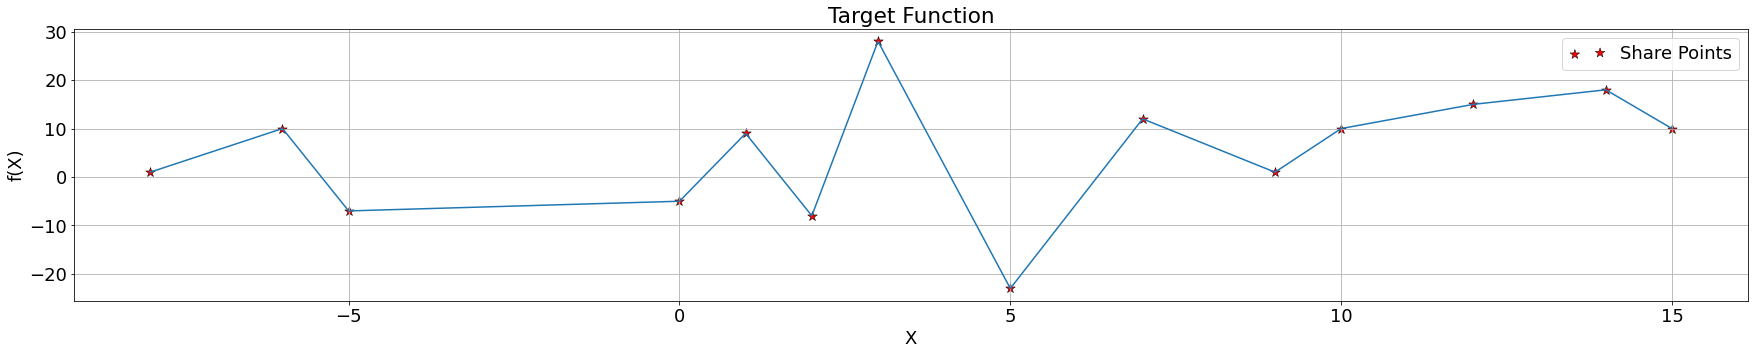

In [37]:
'''Generate the target function f'''

def TargetFunction(x,y,markersize):
    f = plt.figure()
    f.set_figwidth(30)
    f.set_figheight(5)
    plt.plot(x,y)
    p1=plt.scatter(x,y,marker = '*',s=markersize,edgecolors = 'black', linewidth=.5,c = 'red')
    plt.legend([p1],['Share Points'],scatterpoints=2,loc ="upper right")
    plt.xlabel('X')
    plt.ylabel('f(X)')
    plt.title('Target Function')
    plt.rcParams.update({'font.size': 18})
    plt.grid()
    return plt


f = TargetFunction(x,y,markersize = 100)



### <span style="color:blue">[1.2)](#toa)(10 pts) Compute "the best" approximant function $g$ using Wavelet basis functions with adequate parameters to approximate $f$ with a relative $L_2$ norm below 30% error; use a continuous approximation equivalent to an infinite number of collocation points ($m\rightarrow\infty$). Report the number of packets, modes, and other parameters used, show a comparison plot, compute the $L_2$ norm relative error. Explain why the end points of the approximation do not match the given data.
</span><a id="a12"></a>

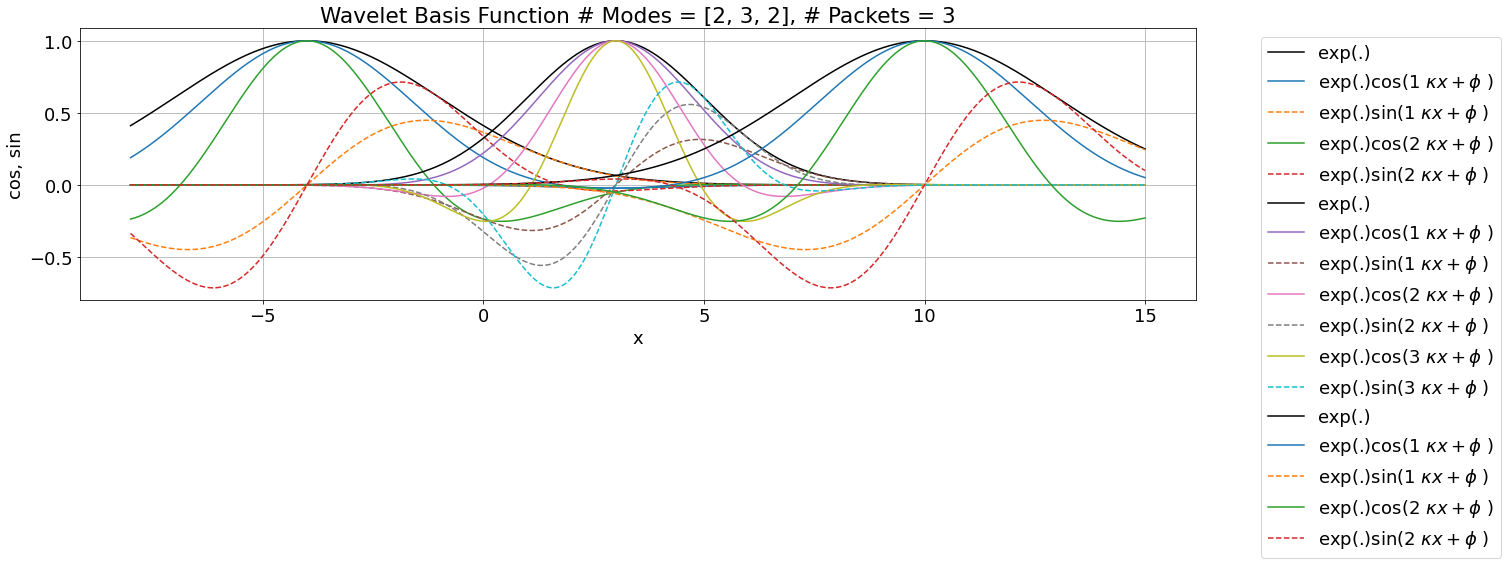

In [38]:
'''Build the basis functions'''
m = 1000
x_min = shape_pts[:,0][0]
x_max = shape_pts[:,0][-1]


x_new = np.linspace(x_min,x_max,m)

def WaveletBasis(x_new, kappa, bunch_pts, N, sigma, phase_shift, points_n):
    A = np.zeros((points_n,int(sum(N)* 2 + len(N))))

    j=0
    for i, modes in enumerate(N):
        sig = sigma[i]
        p = bunch_pts[i]
        first_col = int(sum(N[:i]))*2+i
        A[:,first_col] = np.exp(-((x_new-p)**2)/(2*(sig**2)))
        #print(np.exp(-((x_new-p)**2)/(2*(sig**2))))
        for mode_num in range(modes):
            column = first_col + (mode_num*2) + 1
            j = mode_num + 1
            #points = (())
            A[:,column] = np.exp(-((x_new-p)**2)/(2*(sig**2)))*(np.cos(j*kappa*(x_new-p) + (phase_shift*x_new**2)/2))
            A[:,column+1] = np.exp(-((x_new-p)**2)/(2*(sig**2)))*((np.sin(j*kappa*(x_new-p) + (phase_shift*x_new**2)/2)))
    return np.array(A)

def Single_wavebasis(x,bunch_pts,phase_shift,sigma,j):
    #Z_b=np.zeros((len(x),2*N+1))
    #for j in range((2*N+1)):
    if (j==0):
        mat=np.exp( -((x - bunch_pts)**2)/2*sigma**2)
    elif (j%2)==1:
        mat=(np.exp( -((x - bunch_pts)**2)/2*sigma**2))*((np.cos(((j//2)+1)*Kappa*x)+(phase_shift*(x**2)*0.5)))
    elif (j%2)==0:
        mat=(np.exp(-((x - bunch_pts)**2)/2*sigma**2))*((np.sin(((j//2)+1)*Kappa*x)+(phase_shift*(x**2)*0.5)))
    return mat






def index_hand(p):
    t0=0
    if p>=1:
        for i in range(p):
            t0=t0+(2*N[i]+1)
    return t0


#-------------------------------------------------------------------------------------------------------------------------------------------------#
m = 1000
N = [2, 3, 2]
bunch_pts = [-4, 3, 10]
sigma = [3, 2, 3]
phase_shift = 0
P = len(N)

x_min = shape_pts[:,0][0]
x_max = shape_pts[:,0][-1]
wavelength = x_max - x_min
x_new = np.linspace(x_min,x_max,m)

Kappa = (2*math.pi)/wavelength

#-------------------------------------------------------------------------------------------#
A = WaveletBasis(x_new, Kappa, bunch_pts, N, sigma, phase_shift,m)
#-------------------------------------------------------------------------------------------#


def plotWavelet(N,bunch_pts,phase_shift,sigma,kappa,x_min,x_max,x,y,m):

    #num_plotting_pts = 1000
    x_new = np.linspace(x_min, x_max, m)
    A = WaveletBasis(x_new, kappa, bunch_pts, N, sigma, phase_shift,m)

    fig = plt.figure(figsize=(20, 5))
    ax = plt.subplot(111)

    plt.grid()
    plt.title(f"Wavelet Basis Function # Modes = {N}, # Packets = {len(N)}")
    plt.xlabel('x'); plt.ylabel('cos, sin')
    for i, modes in enumerate(N):
        first_col = int(sum(N[:i])) * 2 + i
        plt.plot(x_new, A[:, first_col], "k-", label="exp(.)")
        for modeNum in range(modes):
            # Iterates through an individual packet
            column = first_col + (modeNum) * 2 + 1

            k = modeNum + 1

            plt.plot(x_new, A[:, column],'-' ,label=r"exp(.)cos(%i $\kappa x + \phi$ )" % k)
            plt.plot(x_new, A[:, column + 1],'--' ,label=r"exp(.)sin(%i $\kappa x + \phi$ )" % k)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    return plt.show()
    
    
plotWavelet(N, bunch_pts, phase_shift, sigma, Kappa, x_min, x_max, x, y, m)

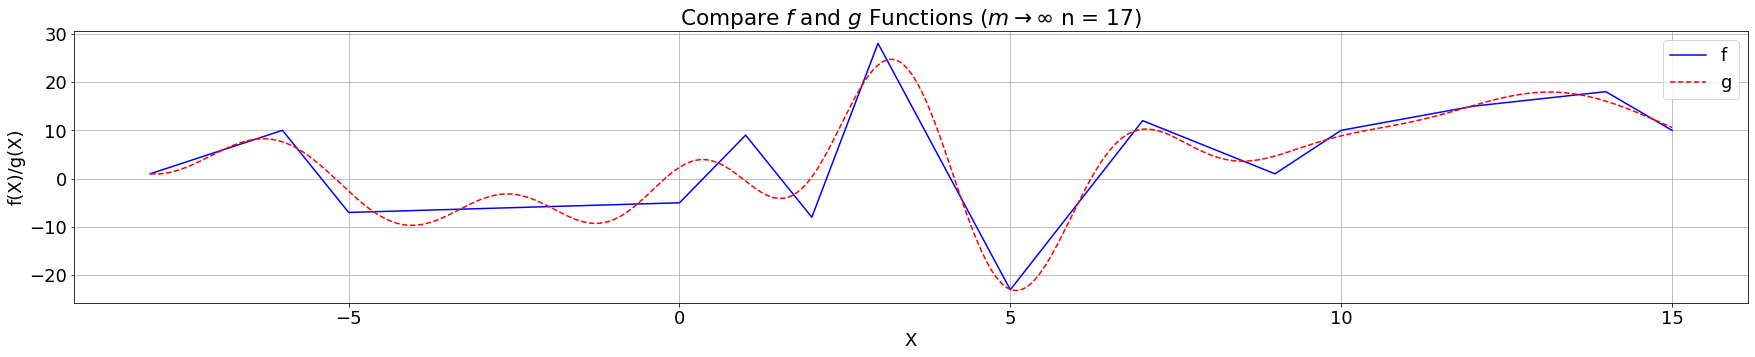

In [39]:
'''Plot comparison of f and g_best_vec'''

x_min = shape_pts[:,0][0]
x_max = shape_pts[:,0][-1]
m = 22
assert m >= len(shape_pts)
markersize = 50

u = interpolate.interp1d(x, y, kind='linear',fill_value='array-like')
x_coll = np.linspace(x_min, x_max, m)

y_new = u(x_coll)



def evaluation(x_coll):
    a_tilde_mtrx = WaveletBasis(x_coll, Kappa, bunch_pts, N, sigma, phase_shift,m)
    return np.array(a_tilde_mtrx)
#------------------------------------------------------------------------------------------------------------------#

a_tilde_mtrx = evaluation(x_coll)

#====================================================================================================================#

f_tilde_vec = np.array(y_new)


#===================================================================================================================#
'''Compute optimal coefficient vector'''

if np.linalg.matrix_rank(a_tilde_mtrx) == min(a_tilde_mtrx.shape):
#    print('A is full rank; solve for least squares.')
    
    c_tilde_star_vec = solve(a_tilde_mtrx.transpose()@a_tilde_mtrx, a_tilde_mtrx.transpose()@f_tilde_vec)
else:
#    print('A is rank deficient; solve for shortest least squares')
    c_tilde_star_vec = universal_solve(a_tilde_mtrx.transpose()@a_tilde_mtrx, a_tilde_mtrx.transpose()@f_tilde_vec,
                                       pivot_tol=1e-9)

#TODO collect coefficients
# print('')
# print('c_tilde_star_vec:\n')
# for j,c in enumerate(c_tilde_star_vec):
#     if j == 0:
#         print('a_%2i = %10.3e'%(j,c))
#     elif j%2 == 0:
#         k = j/2
#         print('b_%2i = %10.3e'%(k,c))
#     else:
#         k = (j+1)/2
#         print('a_%2i = %10.3e'%(k,c))


# print('')        
# print('||r^*||_2 = %10.3e'%(np.linalg.norm(a_tilde_mtrx@c_tilde_star_vec-f_tilde_vec)))

#===================================================================================================================#
'''Build the best approximant function'''

def best_g_vec(x_new,c_tilde_star_vec,points_n):
    wav_mtrx = WaveletBasis(x_new, Kappa, bunch_pts, N, sigma, phase_shift, points_n)
    return wav_mtrx@c_tilde_star_vec
#================================================================================================#
'''Plot comparison of f and g_best_vec'''

n=17
title=r'Compare $f$ and $g$ Functions ($m\rightarrow\infty$'+f' n = {n})'



points_n = max(2*m,1000)
x_pts = np.linspace(x_min, x_max, points_n)
#------------------------------------------------------------------------------------------------#

bestg_vec_1 = best_g_vec(x_pts, c_tilde_star_vec,points_n)

def Comparison(x,y,markersize,points_n,title, bestg_vec_1):
    points_n = max(2*m,100)
    x_tilde_pts_new = np.linspace(x_min, x_max, points_n)
    f = plt.figure()
    f.set_figwidth(30)
    f.set_figheight(5)
    p1 = plt.plot(x,y,'b-', label = 'f')
    p2 = plt.plot(x_pts, bestg_vec_1, 'r--', label = 'g')
    plt.legend(loc ="best")
    plt.xlabel('X')
    plt.ylabel('f(X)/g(X)')
    plt.title(title)
    plt.rcParams.update({'font.size': 18})
    plt.grid()
    return plt

comparison = Comparison(x,y,markersize,points_n,title, bestg_vec_1)

In [40]:
'''L2 norm error'''

def f_integrand(x):
    return u(x)**2
f_integral = quad(f_integrand, x_min, x_max, limit=1000)
f_l2=np.sqrt(f_integral)

print('||f||_L2 =%10.6f'%f_l2[0])
print('quadrature error =%10.6e'%f_l2[1])

def g2_integrand(x):
    g_vec = best_g_vec(np.array([x]),c_tilde_star_vec,points_n)
    return g_vec**2
#f2 = np.vectorize(g2_integrand)

print('')

g2_integral, error = quad_vec(g2_integrand, x_min, x_max, limit=1000)
g2_integral_value_vect=np.sqrt(g2_integral)
print('||g||_L2 =', g2_integral_value_vect[0])
print('quadrature error =', error)

def f_minus_g_2_integrand(x):
    f_x = u(np.array([x]))
    g_vec = best_g_vec(np.array([x]),c_tilde_star_vec,points_n)
    return (f_x-g_vec)**2

print('')

f_minus_g_2_integral, error = quad_vec(f_minus_g_2_integrand, x_min, x_max, limit=1000)
f_minus_g_2_integral_vector = np.sqrt(f_minus_g_2_integral)
print('||f-g||_L2 =', f_minus_g_2_integral_vector[0])
print('quadrature error =', error)
r_err=(np.sqrt(f_minus_g_2_integral_vector[0])/np.sqrt(f_integral)*100)
print('')
print('Relative error = %10.6f'%r_err[0],'%')


||f||_L2 = 49.507575
quadrature error =5.392697e-03

||g||_L2 = 51.96323902728161
quadrature error = 1.717969958266985e-06

||f-g||_L2 = 13.418738913999533
quadrature error = 6.426474055995333e-06

Relative error =   7.399190 %


<span style="color:blue">**Explanation:**</span>

### <span style="color:blue">[1.3)](#toa)(15 pts) Constrain the end points of the approximation in 1.2) and compute the relative error. Show in a plot a comparison of the constrained and unconstrained results. Explain the method to constrain the end points and whether the method was effective in this case.
</span><a id="a13"></a>

In [41]:
#Index handler

def index_hand(p):
    t0=0
    if p>=1:
        for i in range(p):
            t0=t0+(2*N[i]+1)
    return t0

#Generating Basis function for Single waves

def Single_wavebasis(x,bunch_pts,phase_shift,sigma,j):
    #Z_b=np.zeros((len(x),2*N+1))
    #for j in range((2*N+1)):
    if (j==0):
        mat=np.exp( -((x - bunch_pts)**2)/2*sigma**2)
    elif (j%2)==1:
        mat=(np.exp( -((x - bunch_pts)**2)/2*sigma**2))*((np.cos(((j//2)+1)*Kappa*x-bunch_pts)+(phase_shift*(x**2)*0.5)))
    elif (j%2)==0:
        mat=(np.exp(-((x - bunch_pts)**2)/2*sigma**2))*((np.sin(((j//2)+1)*Kappa*x-bunch_pts)+(phase_shift*(x**2)*0.5)))
    return mat

#Generating Collocation points 

def genCollocationPts(x,y,x_tilde_pts):
    slopeList = []
    interceptList = []
    for i in range(1, len(x)):
        slope = (y[i] - y[i - 1]) / (x[i] - x[i - 1])
        intercept = y[i] - (slope * x[i])
        slopeList.append(slope)
        interceptList.append(intercept)

    y_tilde_pts = []
    for i in range(len(x_tilde_pts)):
        result = np.where(x <= x_tilde_pts[i])
        x_tildeLoc = result[-1][-1]
        if x_tildeLoc >= len(slopeList):
            x_tildeLoc = len(slopeList) - 1
        y_tilde = x_tilde_pts[i] * slopeList[x_tildeLoc] + interceptList[x_tildeLoc]
        y_tilde_pts.append(y_tilde)
    return(np.asarray(y_tilde_pts))

#Class of Waveletbasis Function =======================================================================================================#

class wavBasisFunctionVec:
    """
    Creates a vector of basis functions that can be called as a list with the .func method
    
    """
    
    def __init__(self,bunch_pts,NList,shift,sigmas,kappa,x_min,x_max,xList,yList):
        self.num_eqns = int(sum(NList)*2+len(NList))
        self.func = []
        self.initBasisFuncs(bunch_pts,NList,shift,sigmas,kappa,x_min,x_max,xList,yList)
        
    def initBasisFuncs(self,bunch_pts,NList,shift,sigmas,kappa,x_min,x_max,xList,yList):

        for N_index, N in enumerate(NList):
            #Iterates through each packet

            #Location of the column where the packet starts
            baseColNum = int(sum(NList[:N_index]))*2+N_index

            #Initialize sigma and mean for gaussian
            sigma = sigmas[N_index]
            p = bunch_pts[N_index]
            
            #Fill bounding gaussian function
            def targetFunc(x,p=p,sigma=sigma):
                return(np.exp(-((x-p)**2)/(2*(sigma**2))))
            self.func.append(targetFunc)


            for modeNum in range(N):
                #Iterates through the rest of the packet

                #loc is col num where mode begins
                loc = baseColNum+(modeNum)*2 + 1

                #Calculates k value
                k = modeNum+1
                
                #Fill Cosine Func
                def targetFunc(x,p=p,sigma=sigma,k=k,kappa=kappa,shift=shift):
                    return(np.exp(-((x-p)**2)/(2*(sigma**2)))*(np.cos(k*kappa*(x-p) + (shift*x**2)/2)))
                self.func.append(targetFunc)
            

                #Fill Sine Func
                def targetFunc(x,p=p,sigma=sigma,k=k,kappa=kappa,shift=shift):
                    return(np.exp(-((x-p)**2)/(2*(sigma**2)))*(np.sin(k*kappa*(x-p) + (shift*x**2)/2)))
                self.func.append(targetFunc)

#======================================================================================================#

def genGramMtrx_con(NList,bunch_pts,shift,sigmas,kappa,x_min,x_max,xList,yList):
    phiVec = wavBasisFunctionVec(bunch_pts,NList,shift,sigmas,kappa,x_min,x_max,xList,yList)
    P = len(bunch_pts)
    num_eqns = int(sum(NList)*2+len(NList))
    gramMtrx = np.zeros((num_eqns,num_eqns))

    for N_index, N in enumerate(NList):
        baseColNum = int(sum(NList[:N_index]))*2+N_index
        sigma = sigmas[N_index]
        p = bunch_pts[N_index]
        for distToDiag in range(baseColNum+1):
            targetFunc = lambda x : np.exp(-((x-p)**2)/(2*(sigma**2))) * phiVec.func[distToDiag](x)
            gramMtrx[distToDiag,baseColNum] = (scipy.integrate.quad(targetFunc,x_min,x_max,limit=1000)[0]+targetFunc(x_min)+targetFunc(x_max))
        for modeNum in range(N):
            loc = baseColNum+(modeNum)*2 + 1

            k = modeNum+1            
            for distToDiag in range(loc+1):                
                targetFunc = lambda x : (np.exp(-((x-p)**2)/(2*(sigma**2)))*np.cos(k*kappa*x + (shift*x**2)/2)) * phiVec.func[distToDiag](x)
                gramMtrx[distToDiag,loc] = (scipy.integrate.quad(targetFunc,x_min,x_max,limit=1000)[0]++targetFunc(x_min)+targetFunc(x_max))            
            for distToDiag in range(loc+2):
                targetFunc = lambda x : np.exp(-((x-p)**2)/(2*(sigma**2)))*(np.sin(k*kappa*x + (shift*x**2)/2)) * phiVec.func[distToDiag](x)
                gramMtrx[distToDiag,loc+1] = (scipy.integrate.quad(targetFunc,x_min,x_max,limit=1000)[0]+targetFunc(x_min)+targetFunc(x_max))
        for rowNum in range(num_eqns):
            for i in range(rowNum):
                gramMtrx[rowNum,i] = gramMtrx[i,rowNum]
    return(gramMtrx)

#======================================================================================================#

def genLoadMtrx_con(NList,bunch_pts,shift,sigmas,kappa,x_min,x_max,xList,yList):
    #Initialize load matrix
    P = len(bunch_pts)

    num_eqns = int(sum(NList)*2+len(NList))
    loadMtrx = np.zeros(num_eqns)

    k=0
    for N_index, N in enumerate(NList):
        #Iterates through each packet

        #Location of the column where the packet starts
        baseColNum = int(sum(NList[:N_index]))*2+N_index

        #Initialize sigma and mean for gaussian
        sigma = sigmas[N_index]
        p = bunch_pts[N_index]

        #Create bounding gaussian for the target packet
        targetFunc = lambda x,p,sigma : np.exp(-((x-p)**2)/(2*(sigma**2))) * genCollocationPts(xList,yList,np.asarray([x]))[0]
        loadMtrx[baseColNum] = (scipy.integrate.quad(targetFunc,x_min,x_max,args=(p,sigma),limit=2000)[0]+targetFunc(x_min,p,sigma)+targetFunc(x_max,p,sigma))
        #print(gramMtrx)
        #(g_integral,g_error) = scipy.integrate.quad(wavSolutionSquared,x_min,x_max,args=(NList,bunch_pts,shift,sigmas,kappa,c_vec),limit=300)

        for modeNum in range(N):
            #Iterates through the rest of the packet

            #loc is col num where mode begins
            loc = baseColNum+(modeNum)*2 + 1

            k = modeNum+1
            #Fill Cosine Func
            targetFunc = lambda x,p,sigma,k,kappa,shift : np.exp(-((x-p)**2)/(2*(sigma**2)))*(np.cos(k*kappa*x + (shift*x**2)/2)) * genCollocationPts(xList,yList,np.asarray([x]))[0]
            
            loadMtrx[loc] = (scipy.integrate.quad(targetFunc,x_min,x_max,args=(p,sigma,k,kappa,shift),limit=2000)[0]+targetFunc(x_min,p,sigma,k,kappa,shift)+targetFunc(x_max,p,sigma,k,kappa,shift))
            
            #Fill Sine Func
            targetFunc = lambda x,p,sigma,k,kappa,shift : np.exp(-((x-p)**2)/(2*(sigma**2)))*(np.sin(k*kappa*x + (shift*x**2)/2)) * genCollocationPts(xList,yList,np.asarray([x]))[0]
            
            loadMtrx[loc+1] = (scipy.integrate.quad(targetFunc,x_min,x_max,args=(p,sigma,k,kappa,shift),limit=2000)[0]+targetFunc(x_min,p,sigma,k,kappa,shift)+targetFunc(x_max,p,sigma,k,kappa,shift))

    return(loadMtrx)

C:\Users\ashis\AppData\Local\Temp/ipykernel_13420/2968165517.py:161: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  loadMtrx[loc] = (scipy.integrate.quad(targetFunc,x_min,x_max,args=(p,sigma,k,kappa,shift),limit=2000)[0]+targetFunc(x_min,p,sigma,k,kappa,shift)+targetFunc(x_max,p,sigma,k,kappa,shift))


(3500,)


C:\Users\ashis\AppData\Local\Temp/ipykernel_13420/2968165517.py:166: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  loadMtrx[loc+1] = (scipy.integrate.quad(targetFunc,x_min,x_max,args=(p,sigma,k,kappa,shift),limit=2000)[0]+targetFunc(x_min,p,sigma,k,kappa,shift)+targetFunc(x_max,p,sigma,k,kappa,shift))


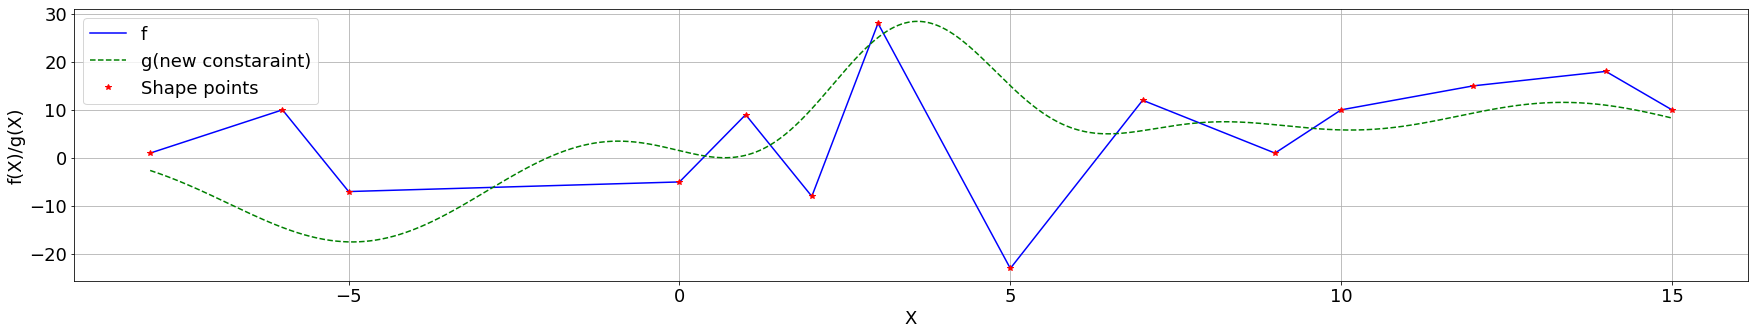

In [42]:
'''Plot comparison of f and g_best_vec with constrained end points'''

gram_matrx_con = genGramMtrx_con(N,bunch_pts,phase_shift,sigma,Kappa,x_min,x_max,x,y)
b_vec_c = genLoadMtrx_con(N,bunch_pts,phase_shift,sigma,Kappa,x_min,x_max,x,y)


c_star_vec_con = solve(gram_matrx_con,b_vec_c)

def best_g_vec_con(x_new,c_star_vec_con):
    a_mtrx = WaveletBasis(x_new, Kappa, bunch_pts, N, sigma, phase_shift, n_pts)
    return a_mtrx@c_star_vec_con

m = 22
n_pts = max(2*m,3500)
x_min = shape_pts[:,0][0]
x_max = shape_pts[:,0][-1]
x_new = np.linspace(x_min,x_max,n_pts)
best_g_vec_c = best_g_vec_con(x_new,c_star_vec_con)
print(best_g_vec_c.shape)



def Comparison(shape_pts, best_g_vec_c):
    f = plt.figure()
    f.set_figwidth(30)
    f.set_figheight(5)
    plt.plot(shape_pts[:,0],shape_pts[:,1],'b-', label = 'f')
    plt.plot(x_new, best_g_vec_c, 'g--', label = 'g(new constaraint)')
    #plt.plot(x_pts, bestg_vec_1, 'r--', label = 'g')
    plt.plot(shape_pts[:,0], shape_pts[:,1], '*', color='red',label='Shape points')
    plt.legend(loc ="best")
    plt.xlabel('X')
    plt.ylabel('f(X)/g(X)')
    plt.rcParams.update({'font.size': 18})
    plt.grid()
    return plt

comparison = Comparison(shape_pts, best_g_vec_c)


In [43]:
'''L2 norm error'''
def f_integrand(x):
    return u(x)**2
f_integral = quad(f_integrand, x_min, x_max, limit=1000)
f_l2=np.sqrt(f_integral)

print('||f||_L2 =%10.6f'%f_l2[0])
print('quadrature error =%10.6e'%f_l2[1])

def g2_integrand(x):
    g_vec = best_g_vec_con(x,c_star_vec_con)
    return g_vec**2
#f2 = np.vectorize(g2_integrand)

print('')

g2_integral, error = quad_vec(g2_integrand, x_min, x_max, limit=1000)
g2_integral_value_vect=np.sqrt(g2_integral)
print('||g||_L2 =', g2_integral_value_vect[0])
print('quadrature error =', error)

def f_minus_g_2_integrand(x):
    f_x = u(np.array([x]))
    g_vec = best_g_vec_con(x,c_star_vec_con)
    return (f_x-g_vec)**2

print('')

f_minus_g_2_integral, error = quad_vec(f_minus_g_2_integrand, x_min, x_max, limit=1000)
f_minus_g_2_integral_vector = np.sqrt(f_minus_g_2_integral)
print('||f-g||_L2 =', f_minus_g_2_integral_vector[0])
print('quadrature error =', error)
r_err=(np.sqrt(f_minus_g_2_integral_vector[0])/np.sqrt(f_integral)*100)
print('')
print('Relative error = %10.6f'%r_err[0],'%')



||f||_L2 = 49.507575
quadrature error =5.392697e-03

||g||_L2 = 56.45854628477672
quadrature error = 3.0774936031062513e-07

||f-g||_L2 = 57.707225184628115
quadrature error = 0.00021892893580296923

Relative error =  15.344171 %


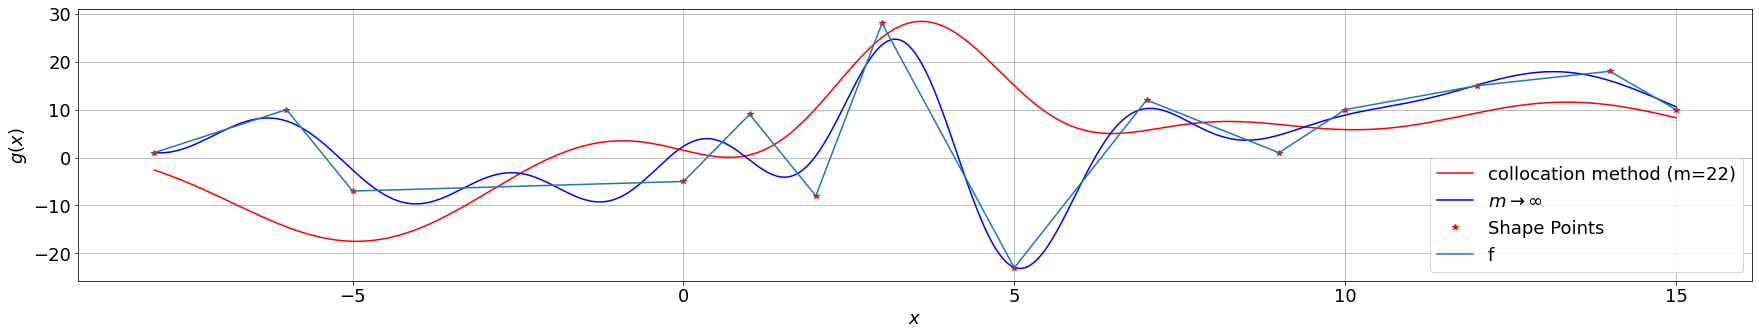

In [44]:
'''Code for comparison of methods'''

plt.figure(1, figsize=(30, 5))
x_pts1 = np.linspace(x_min, x_max, len(best_g_vec_c))
x_pts2 = np.linspace(x_min, x_max, len(bestg_vec_1))
plt.plot(x_pts1,best_g_vec_c,'r-', label = f'collocation method (m={str(m)})')
plt.plot(x_pts2, bestg_vec_1, 'b-', label = r'$m\rightarrow \infty$')
plt.plot(shape_pts[:,0], shape_pts[:,1],'*',color = 'red',label = 'Shape Points')
plt.plot(shape_pts[:,0], shape_pts[:,1], label = 'f')
plt.ylabel(r'$g(x)$')
plt.xlabel(r'$x$')
plt.legend(loc='best')
plt.rcParams.update({'font.size': 18})
plt.grid(True)

<span style="color:blue">**Explanation:**</span>

## <span style="color:blue">[Assignment 2 (65 pts)](#toa)</span><a id="a2"></a>

### <span style="color:blue">[2.1)](#toa)(35 pts) Approximate the piecewise linear function of 1.1) using Fourier Basis functions using 8 modes so that both the end points and the derivative at the end points are constrained by the corresponding values of the target function. Compute the relative error. Explain the method you developed and your results.</span><a id="a21"></a>

C:\Users\ashis\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ashis\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0, flags=flags)


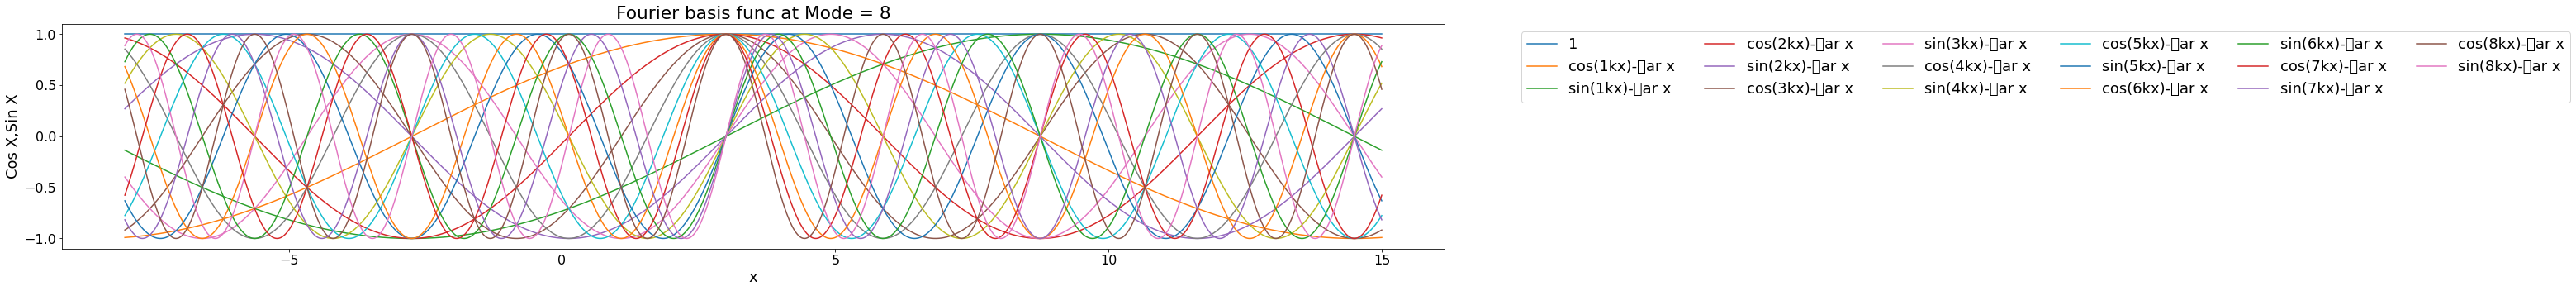

[[ 1.          1.          1.         ...  1.          1.
   1.        ]
 [-0.99068595 -0.98980994 -0.98889478 ... -0.99232036 -0.99152276
  -0.99068595]
 [-0.13616665 -0.14239481 -0.14861734 ... -0.12369442 -0.1299331
  -0.13616665]
 ...
 [-0.81696989 -0.84155916 -0.86451748 ... -0.76309221 -0.79079733
  -0.81696989]
 [ 0.46006504  0.41482699  0.36853895 ...  0.54693611  0.5041386
   0.46006504]
 [ 0.88788522  0.90990031  0.92961231 ...  0.83717435  0.86362276
   0.88788522]]


In [45]:
'''Build the basis functions list'''
m = 1000
shift_fourier = 3
x_tilde_pts = np.linspace(x_min,x_max,m)
u = interpolate.interp1d(x, y, kind='linear',fill_value='array-like')
y_new = u(x_tilde_pts)
Kappa=2*(np.pi)/wavelength
N=8


def FourierBasis(x,N,shift_fourier,Kappa):
    function=np.zeros((len(x),2*N+1))
    for i in range (len(x)):
        for j in range((2*N+1)):
            if (j==0):
                function[i,j]=1
            elif (j%2)==1:
                function[i,j]=np.cos(((j//2)+1)*Kappa*(x[i]-shift_fourier))
            elif (j%2)==0:
                function[i,j]=np.sin((j//2)*Kappa*(x[i]-shift_fourier))
    return np.array(function)

def Plot(function,x_pts):
    f = plt.figure()
    f.set_figwidth(30)
    f.set_figheight(5)
    for i in range(len(function[0])):
        if i==0:
            plt.plot(x_pts,function[:,0],label='1')
        elif i%2==1:
            plt.plot(x_pts,function[:,i], label='cos(%ikx)-\bar x'%(((i/2)+0.5)))
        elif i%2==0 and i!=0:
            plt.plot(x_pts,function[:,i], label='sin(%ikx)-\bar x'%(i/2))
        for j in range(len(function[0])//2):
            plt.legend(ncol=6,bbox_to_anchor=(1.05, 1.0), loc='upper left')
        plt.xlabel('x'); plt.ylabel('Cos X,Sin X')
        plt.title('Fourier basis func at Mode = %i'%N)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
    return plt.show()


a_tilde_mtrx=FourierBasis(x_tilde_pts,N,shift_fourier,Kappa)
Plot(a_tilde_mtrx,x_tilde_pts)
print(np.matrix.transpose(a_tilde_mtrx))

C:\Users\ashis\AppData\Local\Temp/ipykernel_13420/4204984414.py:69: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  b_vec_c[i] = (quad(Load_vec_con, x_min, x_max, args = (i,K,shift_fourier), limit = 10000)[0])+Load_vec_con(x_min,i,K,shift_fourier)+Load_vec_con(x_max,i,K,shift_fourier)+derivative_Load_vec_con(x_min,i,K,shift_fourier)+derivative_Load_vec_con(x_max,i,K,shift_fourier)


(17, 17) (17,)
(17, 17) (17,)


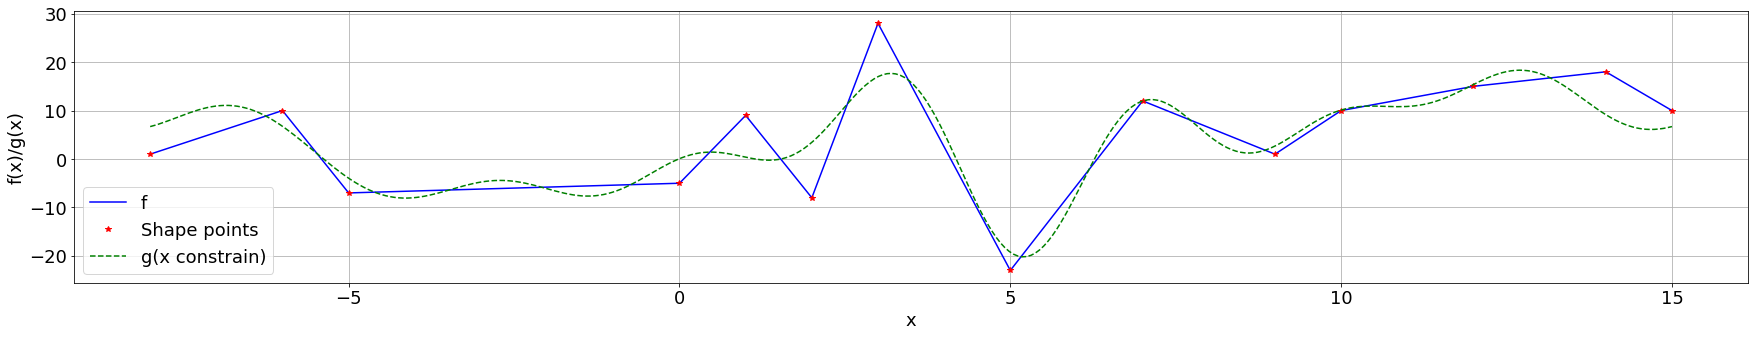

In [56]:
'''Plot comparison of f and g_best_vec with constrained values and derivative at end points'''
#Gram matrix for Fourier basis function
#======================================================================================================#
def index_hand_fourier(p):
    t0=0
    if p>=1:
        for i in range(p):
            t0=t0+(2*N+1)
    return t0

def FourierBasis_single(x_pts,j,K,shift_fourier):
    if (j==0):
        mat=1
    elif (j%2)==1:
        mat=np.cos(((j//2)+1)*K*(x_pts-shift_fourier))
    elif (j%2)==0:
        mat=np.sin((j//2)*K*(x_pts-shift_fourier))
    return mat

def derivative_FourierBasis_single(x_pts,j,K,shift_fourier):
    if (j==0):
        mat = 0
    elif (j%2)==1:
        mat = -(((j//2)+1)*K*np.sin(((j//2)+1)*K*(x_pts-shift_fourier)))
    elif (j%2)==0:
        mat = (((j//2)+1)*K*np.cos((j//2)*K*(x_pts-shift_fourier)))
    return mat

def FourierBasis_matrix(x_pts,N,K,shift_fourier):
    matrix = np.zeros((len(x_pts),2*N+1))
    for i in range (len(x_pts)):
        for j in range((2*N+1)):
            matrix = FourierBasis_single(x_pts[i],j,K,shift_fourier)
    return np.array(matrix)

def derivative_g_c(x,i,j,K,shift_fourier):
    g_it_c = derivative_FourierBasis_single(x,i,K,shift_fourier)*derivative_FourierBasis_single(x,j,K,shift_fourier)
    return g_it_c

def g_c(x,i,j,K,shift_fourier):
    g_i_c = FourierBasis_single(x,i,K,shift_fourier)*FourierBasis_single(x,j,K,shift_fourier)
    return g_i_c

def f_das(x):
    dx = np.array(10**(-6))
    derivative = ((u(x+dx)-u(x))/dx)
    return derivative

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++#
def Fourierbasis_gram_matrix(N,K,x_min,x_max,shift_fourier):
    gram_matrx_con = np.zeros(((np.sum(2*N)+1),(np.sum(2*N)+1)))
    for p in range(1):
        for i in range(2*N+1):
            for j in range(2*N+1):
                gram_matrx_con[int(index_hand_fourier(p)+i),int(index_hand_fourier(p)+j)] = (quad(g_c,x_min,x_max,args = (i,j,K,shift_fourier), limit = 10000)[0])+g_c(x_min,i,j,K,shift_fourier)+g_c(x_max,i,j,K,shift_fourier)+derivative_g_c(x_min,i,j,K,shift_fourier)+derivative_g_c(x_max,i,j,K,shift_fourier)
    return gram_matrx_con

def Load_vec_con(x,i,K,shift_fourier):
    load_el_con = (FourierBasis_single(x,i,K,shift_fourier)*u(x))
    return load_el_con

def derivative_Load_vec_con(x,i,K,shift_fourier):
    load_el_dev = (derivative_FourierBasis_single(x,i,K,shift_fourier)*u(x))
    return load_el_dev

def Fourier_load_vector(N,K,x_min,x_max,shift_fourier):
    b_vec_c =np.zeros((np.sum(2*N)+1))
    for i in range(2*N + 1):
        b_vec_c[i] = (quad(Load_vec_con, x_min, x_max, args = (i,K,shift_fourier), limit = 10000)[0])+Load_vec_con(x_min,i,K,shift_fourier)+Load_vec_con(x_max,i,K,shift_fourier)+derivative_Load_vec_con(x_min,i,K,shift_fourier)+derivative_Load_vec_con(x_max,i,K,shift_fourier)
    return b_vec_c



N = 8
m = 22
n_pts = max(2*m,350)
x_pts = np.linspace(x_min,x_max,n_pts)

fourierbasis_gram_matrix = Fourierbasis_gram_matrix(N,Kappa,x_min,x_max,shift_fourier)

fourier_load_vector = Fourier_load_vector(N,Kappa,x_min,x_max,shift_fourier)

print(fourierbasis_gram_matrix.shape,fourier_load_vector.shape)

c_star_vec_con = solve(fourierbasis_gram_matrix,fourier_load_vector)
print(fourierbasis_gram_matrix.shape,c_star_vec_con.shape)

def bestg_vec_func_con(x,N,c_star_vec_con,K,shift_fourier):
    a_mtrx = FourierBasis(x,N,shift_fourier,K)
    return a_mtrx@c_star_vec_con

g_best_vec_1=bestg_vec_func_con(x_pts,N,c_star_vec_con,Kappa,shift_fourier)



############################################################
# f_tilde_vec = np.array(y_new)

# c_tilde_star_vec = solve(a_tilde_mtrx.transpose()@a_tilde_mtrx, a_tilde_mtrx.transpose()@f_tilde_vec)
    
# #================================================================================================#
# def g_best_vec_func(x_pts):
#     a_mtrx = FourierBasis(x_pts,N,shift_fourier,Kappa)
#     #print(a_mtrx[0])
#     return a_mtrx@c_tilde_star_vec
# n_pts = max(2*m, 200)
# x_pts = np.linspace(x_min, x_max, n_pts)
# g_best_vec_1 = g_best_vec_func(x_pts)

####################################################################################
'''Plot comparison of f and g_best_vec'''
#plt.scatter(new_x,new_f, marker = '*')

plt.rcParams["figure.figsize"] = (30,5)
plt.plot(x,y,'b-', label = 'f')
plt.plot(x, y, '*', color='red',label='Shape points')
plt.plot(x_pts,g_best_vec_1,'--',label='g(x constrain)', color='green')
plt.legend(loc="best")
plt.xlabel('x');plt.ylabel("f(x)/g(x)");plt.grid()
plt.rcParams.update({'font.size': 18})
plt.show()


In [64]:
def FourierBasis(x):
    function=np.zeros((len(x),2*N+1))
    for i in range (len(x)):
        for j in range((2*N+1)):
            if (j==0):
                function[i,j]=1
            elif (j%2)==1:
                function[i,j]=np.cos(((j//2)+1)*Kappa*(x[i]-shift_fourier))
            elif (j%2)==0:
                function[i,j]=np.sin((j//2)*Kappa*(x[i]-shift_fourier))
    return np.array(function)

def g_best_vec_func(x_pts):
    a_mtrx = FourierBasis(x_pts)
    #print(a_mtrx[0])
    return a_mtrx@c_star_vec_con

In [65]:
'''L2 norm error'''


def f_integrand(x):
    return u(x)**2
f_integral = quad(f_integrand, x_min, x_max, limit=1000)
f_l2=np.sqrt(f_integral)

print('||f||_L2 =%10.6f'%f_l2[0])
print('quadrature error =%10.6e'%f_l2[1])

def g2_integrand(x):
    g_vec = g_best_vec_func(np.array([x]))
    return g_vec**2

print('')

g2_integral, error = quad(g2_integrand, x_min, x_max, limit=1000)
print('||g||_L2 =', math.sqrt(g2_integral))
print('quadrature error =', error)

def f_minus_g_2_integrand(x):
    f_x = u(np.array([x]))
    g_vec = g_best_vec_func(np.array([x]))
    return (f_x-g_vec)**2

print('')

f_minus_g_2_integral, error = quad(f_minus_g_2_integrand, x_min, x_max, limit=1000)
print('||f-g||_L2 =', math.sqrt(f_minus_g_2_integral))
print('quadrature error =', error)
r_err=(math.sqrt(f_minus_g_2_integral)/np.sqrt(f_integral)*100)
print('')
print('Relative error = %10.6f'%r_err[0],'%')



||f||_L2 = 49.507575
quadrature error =5.392697e-03

||g||_L2 = 46.61331075936527
quadrature error = 4.17129549155318e-09

||f-g||_L2 = 16.450761544892227
quadrature error = 4.073039662421277e-05

Relative error =  33.228777 %


C:\Users\ashis\AppData\Local\Temp/ipykernel_13420/4026589817.py:60: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  f_minus_g_2_integral, error = quad(f_minus_g_2_integrand, x_min, x_max, limit=1000)


<span style="color:blue">**Explanation:**</span>

### <span style="color:blue">[2.2)](#toa)(30 pts) Show numerically why the derivative at the end points cannot match the target function derivatives. Explain.</span><a id="a22"></a>

<span style="color:blue">**Explanation:**</span>

## <span style="color:blue">[Assignment 3 (5 pts)](#toa)</span><a id="a3"></a>

### <span style="color:blue">Describe the most unclear point in the content presented so far. Then, make an effort to clarify the point on your own.</span>

<span style="color:blue">**Answer:**</span>

In [ ]:
import sympy as sym

x,j = sym.symbols('x j')
f_cosine = (np.cos(((j//2)+1)*Kappa*(x-shift_fourier)))
f_sine = (np.sin((j//2)*Kappa*(x-shift_fourier)))
diff_sine = sym.diff(f_sine,x)
diff_cosine = sym.diff(f_cosine,x)
print(diff_sine,diff_cosine)


# def FourierBasis_derivative(x,N,shift_fourier,Kappa):
#     function=np.zeros((len(x),2*N+1))
#     for i in range (len(x)):
#         for j in range((2*N+1)):
#             if (j==0):
#                 function[i,j]=sym.diff(1)
#             elif (j%2)==1:
#                 function[i,j]=sym.diff(np.cos(((j//2)+1)*Kappa*(x-shift_fourier)))
#             elif (j%2)==0:
#                 function[i,j]=sym.diff(np.sin((j//2)*Kappa*(x-shift_fourier)))
#     return np.array(function)

#a_tilde_mtrx_differentiated=FourierBasis_derivative(x_tilde_pts,N,shift_fourier,Kappa)
#Plot(a_tilde_mtrx_differentiated,x_tilde_pts)
